<a href="https://colab.research.google.com/github/parniagoodarzi/AIKNTU4032/blob/main/hw1q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
iris_df['target']= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=40)

feature_names = iris.feature_names
target_name = 'species'

train_df = pd.DataFrame(X_train, columns=feature_names)
train_df[target_name] = y_train

test_df = pd.DataFrame(X_test, columns=feature_names)
test_df[target_name] = y_test

train_df['dataset_type'] = 'train'
test_df['dataset_type'] = 'test'


combined_df = pd.concat([train_df, test_df])

print(combined_df)


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.0               2.2                4.0               1.0   
1                 5.1               3.3                1.7               0.5   
2                 5.0               3.4                1.6               0.4   
3                 5.3               3.7                1.5               0.2   
4                 4.7               3.2                1.3               0.2   
..                ...               ...                ...               ...   
25                5.7               3.8                1.7               0.3   
26                4.3               3.0                1.1               0.1   
27                6.5               3.0                5.5               1.8   
28                4.9               3.1                1.5               0.1   
29                5.5               2.4                3.7               1.0   

    species dataset_type  
0         1 

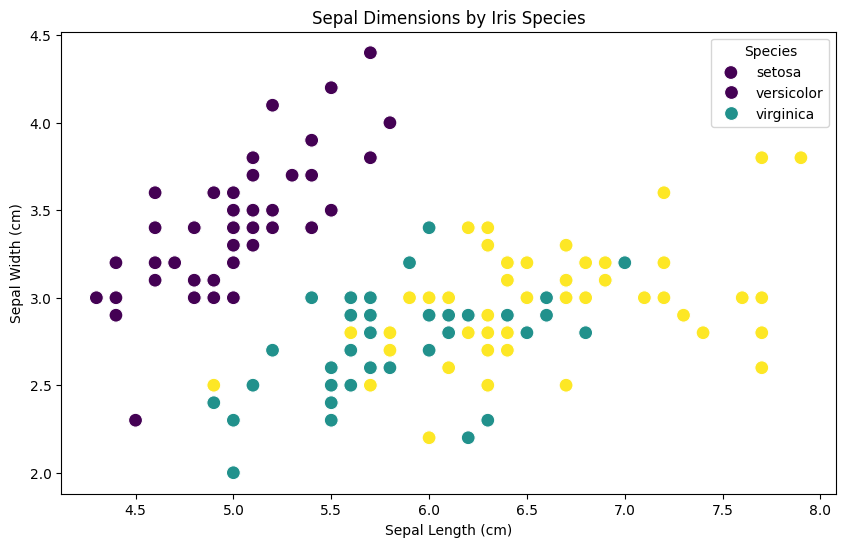

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
                hue='species', palette='viridis', s=100)
plt.title('Sepal Dimensions by Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', labels=iris.target_names)
plt.show()

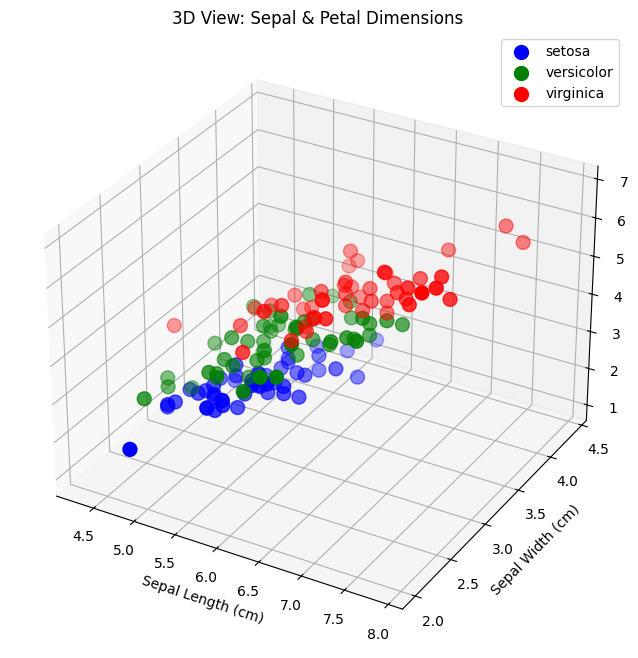

In [16]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for species, color in zip([0, 1, 2], ['blue', 'green', 'red']):
    ax.scatter(
        iris.data[iris.target == species, 0],  # Sepal length
        iris.data[iris.target == species, 1],  # Sepal width
        iris.data[iris.target == species, 2],  # Petal length (for Z-axis)
        c=color,
        label=iris.target_names[species],
        s=100
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D View: Sepal & Petal Dimensions')
ax.legend()
plt.show()

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


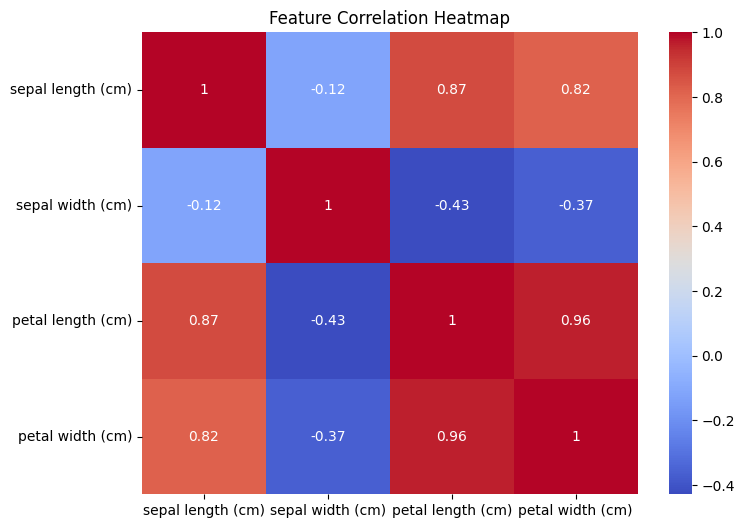

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()


df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = iris.target


print("Columns:", df.columns.tolist())
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['sepal length (cm)', 'sepal width (cm)',
        'petal length (cm)', 'petal width (cm)']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Feature Correlation Heatmap')
plt.show()

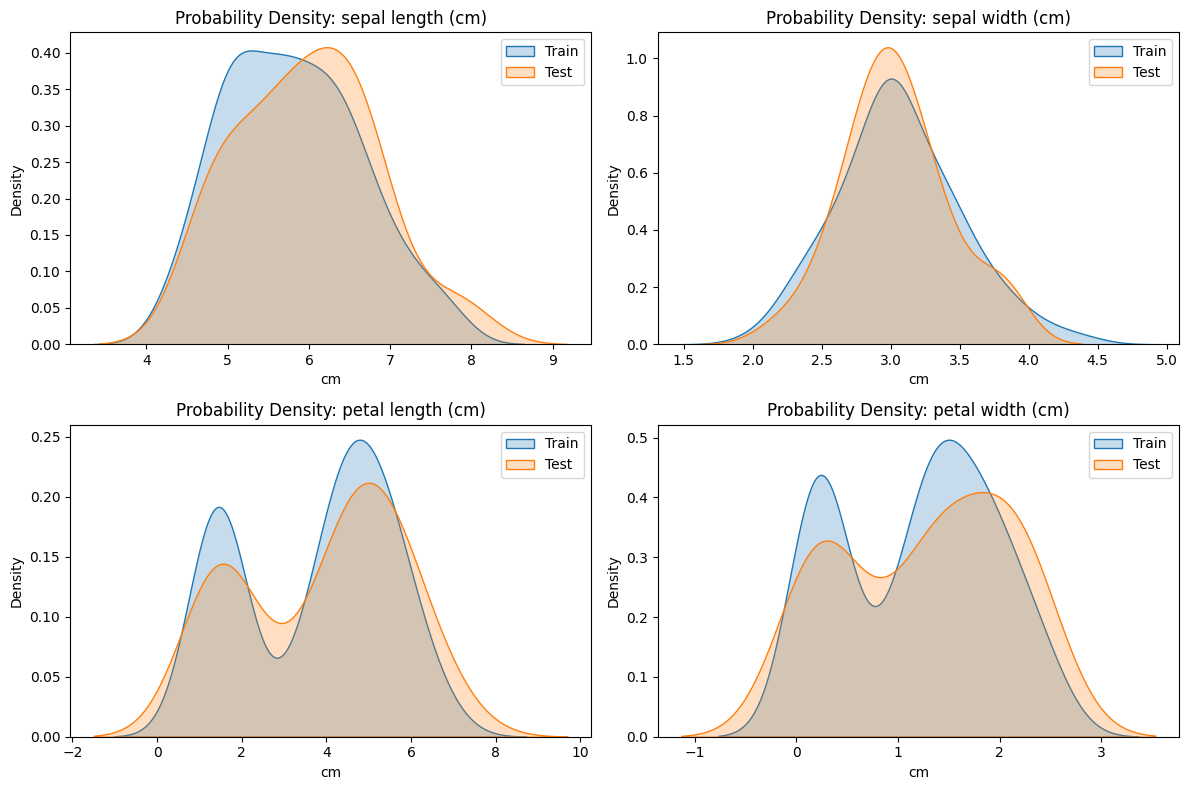

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and split data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create DataFrames
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
test_df = pd.DataFrame(X_test, columns=iris.feature_names)

# Plot density for each feature
features = iris.feature_names
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=train_df[feature], label='Train', fill=True)
    sns.kdeplot(data=test_df[feature], label='Test', fill=True)
    plt.title(f'Probability Density: {feature}')
    plt.xlabel('cm')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.datasets import load_iris
import pandas as pd

# Load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Get min/max of sepal length
min_sepal = df['sepal length (cm)'].min()
max_sepal = df['sepal length (cm)'].max()

print(f"Sepal length range: {min_sepal:.1f}cm to {max_sepal:.1f}cm")

Sepal length range: 4.3cm to 7.9cm


part 3: To convert a continuous feature into three discrete categories:

Fixed Thresholds: Define boundaries based on domain knowledge (e.g., "Short: 4–5 cm"). Simple but may create imbalanced groups.

Equal Quantiles: Use percentiles (33rd, 66th) to split data evenly. Balanced classes, but thresholds may lack intuitive meaning.

In [30]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


bins = [4.0, 5.5, 6.5, 8.0]
labels = ['Short', 'Medium', 'Long']
df['sepal_length_category'] = pd.cut(df['sepal length (cm)'], bins=bins, labels=labels)


pd.set_option('display.max_rows', None)
display(df[['sepal length (cm)', 'sepal_length_category']])
pd.reset_option('display.max_rows')



,sepal length (cm),sepal_length_category
0,5.1,Short
1,4.9,Short
2,4.7,Short
3,4.6,Short
4,5.0,Short
5,5.4,Short
6,4.6,Short
7,5.0,Short
8,4.4,Short
9,4.9,Short


In [26]:
from sklearn.datasets import load_iris
import pandas as pd
from IPython.display import display


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Option 2: Equal frequency discretization (quantile-based)
df['sepal_length_category'] = pd.qcut(
    df['sepal length (cm)'],
    q=3,
    labels=['S', 'M', 'L']
)

pd.set_option('display.max_rows', None)
display(df[['sepal length (cm)', 'sepal_length_category']])
pd.reset_option('display.max_rows')



,sepal length (cm),sepal_length_category
0,5.1,S
1,4.9,S
2,4.7,S
3,4.6,S
4,5.0,S
5,5.4,S
6,4.6,S
7,5.0,S
8,4.4,S
9,4.9,S


In [36]:
from sklearn.datasets import load_iris
import pandas as pd
from google.colab import files  # For downloading


iris = load_iris()
data = iris.data
feature_names = iris.feature_names


df_fixed = pd.DataFrame(data, columns=feature_names)
df_quantile = pd.DataFrame(data, columns=feature_names)


df_fixed['sepal_length_category'] = pd.cut(
    df_fixed['sepal length (cm)'],
    bins=[4.0, 5.5, 6.5, 8.0],
    labels=['Short', 'Medium', 'Long']
)

df_quantile['sepal_length_category'] = pd.qcut(
    df_quantile['sepal length (cm)'],
    q=3,
    labels=['S', 'M', 'L']
)

# Save files
df_fixed.to_csv('iris_fixed_bins.csv', index=False)
df_quantile.to_csv('iris_quantile_bins.csv', index=False)

# Download to your computer
files.download('iris_fixed_bins.csv')
files.download('iris_quantile_bins.csv')

print("Files downloaded to your default download folder!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files downloaded to your default download folder!


In [40]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

setosa_stats = df[df['species'] == 'setosa'].describe()

# Display with 2 decimal places
pd.options.display.float_format = '{:.4f}'.format
print("Statistical Summary for Iris Setosa:")
display(setosa_stats)

Statistical Summary for Iris Setosa:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.0000,50.0000,50.0000,50.0000
mean,5.0060,3.4280,1.4620,0.2460
std,0.3525,0.3791,0.1737,0.1054
min,4.3000,2.3000,1.0000,0.1000
25%,4.8000,3.2000,1.4000,0.2000
50%,5.0000,3.4000,1.5000,0.2000
75%,5.2000,3.6750,1.5750,0.3000
max,5.8000,4.4000,1.9000,0.6000
